In [1]:
import os, shutil
import numpy as np

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

from keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
original_dataset_dir1 = r"C:\Users\adnan\Downloads\DLMini\DogsVCats\training_set\training_set\cats"
original_dataset_dir2 = r"C:\Users\adnan\Downloads\DLMini\DogsVCats\training_set\training_set\dogs"


base_dir = r"C:\Users\adnan\Downloads\DLMini\DogsVCats\training_set\training_set\cats_and_dogs_small"
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)



train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)


fnames = ['cat.{}.jpg'.format(i) for i in range(2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir1, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(2000, 3000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir1, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(3000, 4000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir1, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir2, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(2000, 3000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir2, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(3000, 4000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir2, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [3]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 2000


In [4]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 2000


In [5]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 1000


In [6]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 1000


In [7]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 1000


In [8]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 1000


In [9]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [11]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [13]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [14]:
history = model.fit_generator(train_generator,steps_per_epoch=25,epochs=15,validation_data=validation_generator,validation_steps=50)

C:\Users\adnan\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
25/25 [==============================] - 40s 1s/step - loss: 0.7027 - acc: 0.4778 - val_loss: 0.6896 - val_acc: 0.5330
Epoch 2/15
25/25 [==============================] - 37s 1s/step - loss: 0.6894 - acc: 0.5533 - val_loss: 0.6975 - val_acc: 0.4920
Epoch 3/15
25/25 [==============================] - 38s 2s/step - loss: 0.6912 - acc: 0.5167 - val_loss: 0.6806 - val_acc: 0.5900
Epoch 4/15
25/25 [==============================] - 32s 1s/step - loss: 0.6813 - acc: 0.5645 - val_loss: 0.6718 - val_acc: 0.5750
Epoch 5/15
25/25 [==============================] - 32s 1s/step - loss: 0.6762 - acc: 0.5739 - val_loss: 0.6713 - val_acc: 0.5980
Epoch 6/15
25/25 [==============================] - 31s 1s/step - loss: 0.6645 - acc: 0.5977 - val_loss: 0.6952 - val_acc: 0.5290
Epoch 7/15
25/25 [==============================] - 36s 1s/step - loss: 0.6802 - acc: 0.5805 - val_loss: 0.6686 - val_acc: 0.5660
Epoch 8/15
25/25 [==============================] - 48s 2s/step - loss: 0.6483 - acc: 0.64

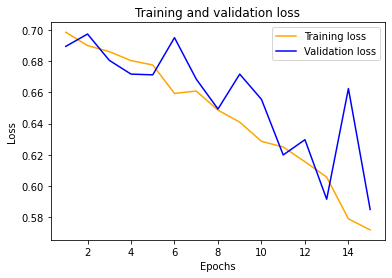

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, 16)

plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

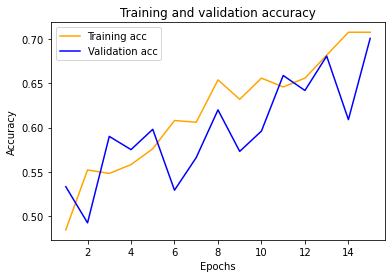

<Figure size 432x288 with 0 Axes>

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, 16)

plt.plot(epochs, acc, 'orange', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.show()

In [17]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

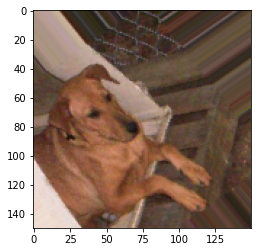

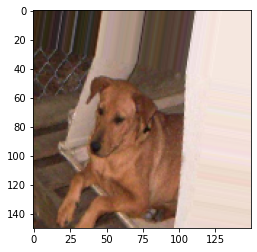

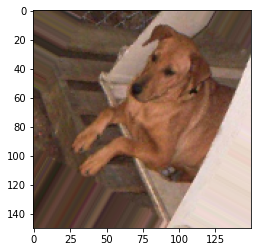

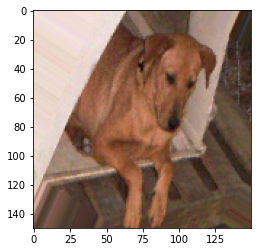

In [18]:
from keras.preprocessing import image
import os
fnames = [os.path.join(train_dogs_dir, fname) for
    fname in os.listdir(train_dogs_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [19]:
model1 = models.Sequential()

model1.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Flatten())

model1.add(layers.Dropout(0.5))

model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [21]:
history1 = model1.fit_generator(train_generator,steps_per_epoch=50,epochs=15,validation_data=validation_generator,validation_steps=50)

Epoch 1/15
50/50 [==============================] - 143s 3s/step - loss: 0.7693 - acc: 0.4976 - val_loss: 0.6864 - val_acc: 0.5525
Epoch 2/15
50/50 [==============================] - 140s 3s/step - loss: 0.6921 - acc: 0.5137 - val_loss: 0.6791 - val_acc: 0.5200
Epoch 3/15
50/50 [==============================] - 138s 3s/step - loss: 0.6836 - acc: 0.5867 - val_loss: 0.6775 - val_acc: 0.5275
Epoch 4/15
50/50 [==============================] - 147s 3s/step - loss: 0.6647 - acc: 0.5807 - val_loss: 0.6369 - val_acc: 0.6319
Epoch 5/15
50/50 [==============================] - 143s 3s/step - loss: 0.6630 - acc: 0.5785 - val_loss: 0.6483 - val_acc: 0.5875
Epoch 6/15
50/50 [==============================] - 148s 3s/step - loss: 0.6550 - acc: 0.6059 - val_loss: 0.6154 - val_acc: 0.6644
Epoch 7/15
50/50 [==============================] - 144s 3s/step - loss: 0.6347 - acc: 0.6471 - val_loss: 0.6113 - val_acc: 0.6444
Epoch 8/15
50/50 [==============================] - 139s 3s/step - loss: 0.6449 - a

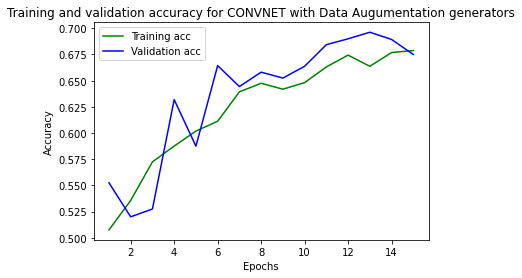

<Figure size 432x288 with 0 Axes>

In [22]:
acc = history1.history['acc']
val_acc = history1.history['val_acc']

epochs = range(1, 16)

plt.plot(epochs, acc, 'green', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy for CONVNET with Data Augumentation generators')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.show()

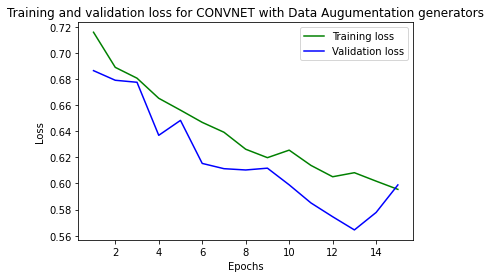

In [23]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, 16)

plt.plot(epochs, loss, 'green', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss for CONVNET with Data Augumentation generators')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)            

In [25]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150, 150, 3))

In [26]:
from keras.preprocessing.image import ImageDataGenerator

base_dir =r"C:\Users\adnan\Downloads\DLMini\DogsVCats\training_set\training_set\cats_and_dogs_small"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [27]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [28]:
model2 = models.Sequential()

model2.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))

model2.add(layers.Dropout(0.5))

model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='binary_crossentropy',metrics=['acc'])

In [29]:
history2 = model2.fit(train_features, train_labels,epochs=15,batch_size=20,validation_data=(validation_features, validation_labels))

Epoch 1/15
100/100 [==============================] - 6s 47ms/step - loss: 0.6518 - acc: 0.6138 - val_loss: 0.4436 - val_acc: 0.8190
Epoch 2/15
100/100 [==============================] - 5s 48ms/step - loss: 0.4516 - acc: 0.7869 - val_loss: 0.3940 - val_acc: 0.8310
Epoch 3/15
100/100 [==============================] - 5s 48ms/step - loss: 0.3498 - acc: 0.8623 - val_loss: 0.3428 - val_acc: 0.8540
Epoch 4/15
100/100 [==============================] - 5s 50ms/step - loss: 0.3202 - acc: 0.8729 - val_loss: 0.3258 - val_acc: 0.8580
Epoch 5/15
100/100 [==============================] - 4s 45ms/step - loss: 0.2953 - acc: 0.8799 - val_loss: 0.3114 - val_acc: 0.8720
Epoch 6/15
100/100 [==============================] - 5s 46ms/step - loss: 0.2574 - acc: 0.8981 - val_loss: 0.3013 - val_acc: 0.8720
Epoch 7/15
100/100 [==============================] - 5s 46ms/step - loss: 0.2581 - acc: 0.8936 - val_loss: 0.2946 - val_acc: 0.8740
Epoch 8/15
100/100 [==============================] - 4s 45ms/step - 

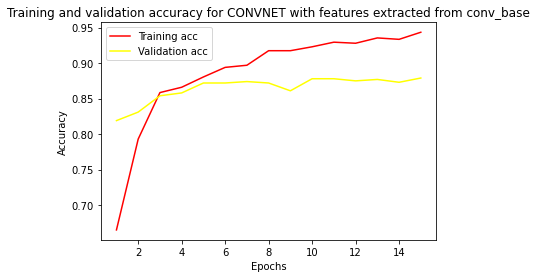

<Figure size 432x288 with 0 Axes>

In [30]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']

epochs = range(1, 16)

plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'yellow', label='Validation acc')
plt.title('Training and validation accuracy for CONVNET with features extracted from conv_base')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.show()

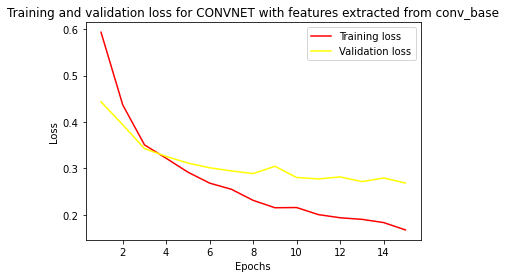

In [31]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, 16)

plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'yellow', label='Validation loss')
plt.title('Training and validation loss for CONVNET with features extracted from conv_base')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


In [33]:
model3 = models.Sequential()

model3.add(conv_base)

model3.add(layers.Flatten())

model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

In [34]:
print('This is the number of trainable weights before freezing the conv base:', len(model3.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [35]:
conv_base.trainable = False
print('This is the number of trainable weights after freezing the conv base:', len(model3.trainable_weights))


This is the number of trainable weights after freezing the conv base: 4


In [36]:
model3.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])

In [37]:
history3 = model3.fit_generator(train_generator,steps_per_epoch=50,epochs=15,validation_data=validation_generator,validation_steps=50)

Epoch 1/15
50/50 [==============================] - 933s 19s/step - loss: 0.6461 - acc: 0.6159 - val_loss: 0.5078 - val_acc: 0.7919
Epoch 2/15
50/50 [==============================] - 933s 19s/step - loss: 0.5389 - acc: 0.7593 - val_loss: 0.4260 - val_acc: 0.8300
Epoch 3/15
50/50 [==============================] - 850s 17s/step - loss: 0.4939 - acc: 0.7864 - val_loss: 0.3784 - val_acc: 0.8506
Epoch 4/15
50/50 [==============================] - 846s 17s/step - loss: 0.4489 - acc: 0.8118 - val_loss: 0.3687 - val_acc: 0.8388
Epoch 5/15
50/50 [==============================] - 948s 19s/step - loss: 0.4294 - acc: 0.8060 - val_loss: 0.3470 - val_acc: 0.8537
Epoch 6/15
50/50 [==============================] - 963s 19s/step - loss: 0.4227 - acc: 0.8186 - val_loss: 0.3479 - val_acc: 0.8431
Epoch 7/15
50/50 [==============================] - 979s 20s/step - loss: 0.3900 - acc: 0.8325 - val_loss: 0.3104 - val_acc: 0.8650
Epoch 8/15
50/50 [==============================] - 918s 19s/step - loss: 0.

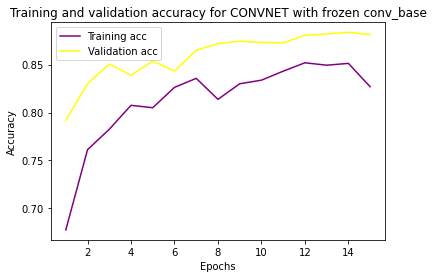

<Figure size 432x288 with 0 Axes>

In [38]:
acc = history3.history['acc']
val_acc = history3.history['val_acc']

epochs = range(1, 16)

plt.plot(epochs, acc, 'purple', label='Training acc')
plt.plot(epochs, val_acc, 'yellow', label='Validation acc')
plt.title('Training and validation accuracy for CONVNET with frozen conv_base')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.show()

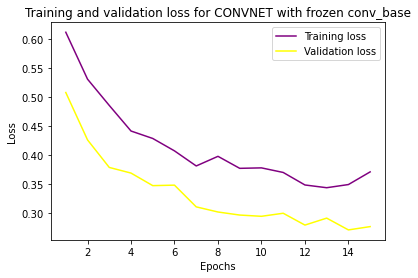

In [39]:
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, 16)

plt.plot(epochs, loss, 'purple', label='Training loss')
plt.plot(epochs, val_loss, 'yellow', label='Validation loss')
plt.title('Training and validation loss for CONVNET with frozen conv_base')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [40]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [41]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [42]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [43]:
model3.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-5),metrics=['acc'])

In [44]:
history4 = model3.fit_generator(train_generator,steps_per_epoch=25,epochs=10,validation_data=validation_generator,validation_steps=50)

Epoch 1/10
25/25 [==============================] - 839s 34s/step - loss: 0.3380 - acc: 0.8527 - val_loss: 0.2867 - val_acc: 0.8831
Epoch 2/10
25/25 [==============================] - 901s 37s/step - loss: 0.3033 - acc: 0.8568 - val_loss: 0.2489 - val_acc: 0.9019
Epoch 3/10
25/25 [==============================] - 761s 31s/step - loss: 0.3273 - acc: 0.8365 - val_loss: 0.2879 - val_acc: 0.8863
Epoch 4/10
25/25 [==============================] - 794s 33s/step - loss: 0.2814 - acc: 0.8707 - val_loss: 0.2397 - val_acc: 0.8975
Epoch 5/10
25/25 [==============================] - 859s 35s/step - loss: 0.2741 - acc: 0.8914 - val_loss: 0.2368 - val_acc: 0.9087
Epoch 6/10
25/25 [==============================] - 786s 32s/step - loss: 0.2978 - acc: 0.8512 - val_loss: 0.2606 - val_acc: 0.9000
Epoch 7/10
25/25 [==============================] - 862s 35s/step - loss: 0.2553 - acc: 0.8850 - val_loss: 0.2193 - val_acc: 0.9119
Epoch 8/10
25/25 [==============================] - 877s 36s/step - loss: 0.

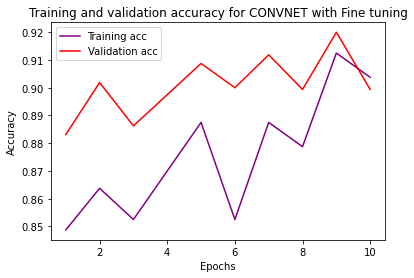

<Figure size 432x288 with 0 Axes>

In [45]:
acc = history4.history['acc']
val_acc = history4.history['val_acc']

epochs = range(1, 11)

plt.plot(epochs, acc, 'purple', label='Training acc')
plt.plot(epochs, val_acc, 'red', label='Validation acc')
plt.title('Training and validation accuracy for CONVNET with Fine tuning')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.show()

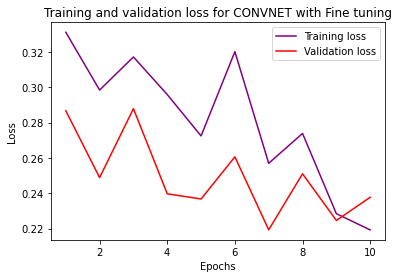

In [46]:
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(1, 11)

plt.plot(epochs, loss, 'purple', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss for CONVNET with Fine tuning')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [47]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [48]:
score = model2.evaluate(test_features, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.26025378704071045
Test accuracy: 0.8899999856948853


In [49]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

image = load_img('dog.jpg', target_size=(224, 224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)

model = VGG16()

yhat = model.predict(image)
label = decode_predictions(yhat)

label = label[0][0]

print('%s (%.2f%%)' % (label[1], label[2]*100))

40960/35363 [==================================] - 0s 0us/step
Labrador_retriever (82.62%)
